In [37]:
import numpy as np
import math as m
import matplotlib.pyplot as plt

1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-life $\tau$ of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

In [ ]:
decay_time = 3.052* 60 #converting to seconds
N_Tl = 1000 #number of Thallium atoms
time step = 1

def prob(t,tau):
    return 1 - 2**(-t/tau)



2\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function: 

$$f(x) =\sin^2{\left( \frac{1}{1-x} \right)}$$

* Plot the function and compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate (hint: repeat the integral $N$ times, and from the distribution of the integrals take the mean value and the standard deviation, the latter rescaled by the appropriate factor)
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one.

The estimation repeated  100 times has mean  1.3462464 and standard deviation  0.00028995059993040166


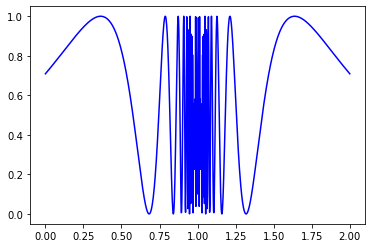

In [19]:
###Applying hit/miss method

#definition of the function given
def f(x):
    return (np.sin(1/(1-x)))**2

#plotting
a = 0.001
b = 1.999
x = np.linspace(a, b, 1000)
plt.plot(x, f(x), 'b-')

samples = len(x)
#print("samples: ",samples)
N = 100000
n = 100
Integral = []

#double cycle to calculate the integral and iterate the calculation n times

for j in range(n):
    count = 0
    for i in range(N):
        x = 2 * np.random.random() # x is random uniform between 0 and 2
        y = np.random.random()     # y is random uniform between 0 and 1
        if y < f(x): count += 1
    I = 2 * count / N
    Integral.append(I)

#getting mean and standard deviation from the obtained list
mean = np.mean(Integral)
std = np.std(Integral)/np.sqrt(n)
print("The estimation repeated ",n, "times has mean ",mean, "and standard deviation ",std)

In [51]:
###Applying the mean value method

#Monte Carlo integration with given function, start and end of period, and number of salmpes
def mc_integ(func, a,b,n):
    
    vals = np.random.uniform(a,b,n)
    
    y = [func(val) for val in vals]
    
    y_mean = np.sum(y)/n
    
    integ = (b-a)*y_mean
    return integ

print("Using the mean value MC method, the integral results: ",mc_integ(f,a,b,samples))

Using the mean value MC method, the integral results:  1.3753137833502183


3\. **Monte Carlo integration in high dimension**

* Compute the area of a circle of unit radius, by integrating the function:

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere.

In [72]:
trials = 100000
hits = 0

for i in range(trials):
    #setting size to 2 for area of the cirle
    x = np.random.random(size = 2)*2 - 1 #centering values in 0 with range -1,1
    #y = np.random.random()*2 - 1
    
    if np.sum(pow(x,2)) <=1 :
        hits +=1
area = 4*xhits/trials

print("Area of the circle is: ",area)

Area of the circle is:  3.13556


4\. **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should expect a result around 0.84.

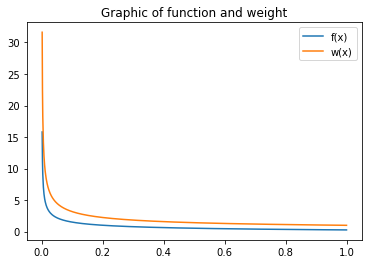

The integral results:  0.762350301323531


In [64]:
import scipy.integrate as integrate
n = 1000

def fun(x): #function to be integrated
    return np.power(x,-0.5)/(np.exp(x)+1)
    
def w(x): #weight function
    return 1/np.sqrt(x)

x = np.linspace(0.001,1,n)
y = [fun(i) for i in x]

#Let's visualize the function and teh weight
plt.plot(x,y)
plt.plot(x,w(x))
plt.legend(["f(x)","w(x)"])
plt.title("Graphic of function and weight")
plt.show()

#integral of the weight function

#weight_int,err = integrate.quad(w,0,1)
weight_int = mc_integ(w,0,1,n)

h_is = (weight_int / n) * np.sum(y/w(x))
print("The integral results: ",h_is)